# Import pandas

In [1]:
import pandas as pd

# Import Iris

In [2]:
dataframe = pd.read_csv('iris.csv')
dataframe.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Understanding dataset

### Data size

In [3]:
dataframe.shape

(150, 5)

### Data cols

In [4]:
dataframe.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
dataframe.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,150.000000,148.000000
mean,5.843624,3.051007,3.758667,1.210135
std,0.830851,0.433499,1.764420,0.761643
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### If any null

In [6]:
dataframe.isnull().sum()

sepal_length    1
sepal_width     1
petal_length    0
petal_width     2
species         2
dtype: int64

### If any dup

In [7]:
dataframe.duplicated().sum()

3

### which are dups

In [8]:
# getting dup rows
dataframe[dataframe.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


### drop nulls

In [9]:
# drop the null rows

# If feature -> replace with mean
# If target -> drop the row

######## numeric_only ########

dataframe.fillna(dataframe.mean(numeric_only=True), inplace=True)

# # Convert all columns that can be to numeric, coercing errors
# dataframe = dataframe.apply(pd.to_numeric, errors='coerce')

# # Handle the null values with the mean of the column
# dataframe.fillna(dataframe.mean(numeric_only=True), inplace=True)


In [10]:
dataframe.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         2
dtype: int64

In [11]:
# Drop the null that are Target

dataframe.dropna(subset=['species'], inplace=True)

In [12]:
dataframe.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### drop dups


In [13]:
# drop duplicates

dataframe.drop_duplicates(inplace=True)
dataframe.duplicated().sum()

0

In [14]:
# dataframe.describe()
dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Defining X & Y

In [15]:
# Features and Target

features = dataframe.drop('species', axis=1)

target = dataframe['species']

In [16]:
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
target.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

# Target is in String, convert to Numerical

In [18]:
# show distinct target values
target.unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
# convert target to numeric

# target = target.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

map_target = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
target = [map_target[i] for i in target]

In [20]:
from sklearn.preprocessing import LabelEncoder

# instance of labelencoder
encoder = LabelEncoder()

target = dataframe['species']
target = encoder.fit_transform(target)

target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Scalling

Use this to avoid biasing of the machine learning

Min max scaling -> 0 to 1


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_minmax = scaler.fit_transform(features)

# features_minmax


Standard Scaling
Mean = 0, Std deviation < 1

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_standard = scaler.fit_transform(features)

features_standard

array([[-0.91504133,  1.04890031, -1.36295376, -1.36861492],
       [-1.15772763, -0.10769949, -1.36295376, -1.36861492],
       [-1.40041392,  0.35494043, -1.41998934, -1.36861492],
       [-1.52175706,  0.12362047, -1.30591817, -1.36861492],
       [-1.03638448,  1.28022027, -1.36295376, -1.36861492],
       [-0.5510119 ,  1.97418015, -1.19184701, -1.10173918],
       [-1.52175706,  0.81758035, -1.36295376, -1.23517705],
       [-1.03638448,  0.81758035, -1.30591817, -1.36861492],
       [-1.76444336, -0.33901945, -1.36295376, -1.36861492],
       [-1.15772763,  0.12362047, -1.30591817, -1.50205279],
       [-0.5510119 ,  1.51154023, -1.30591817, -1.36861492],
       [-1.27907077,  0.81758035, -1.24888259, -1.36861492],
       [-1.27907077, -0.10769949, -1.36295376, -1.50205279],
       [-1.8857865 , -0.10769949, -1.53406051, -1.50205279],
       [-0.01270438,  2.20550011, -1.47702492, -1.36861492],
       [-0.18698246,  3.13077994, -1.30591817, -1.10173918],
       [-0.5510119 ,  1.

Scale only Featrues

write this text bold 

**SCALLING WILL MAKE THE CHART IN ARRAY**



# Correlation analysis

How each column/s affect the target

But we gotta work with it as a **Dataframe**

In [23]:
# revert back to dataframe
features_df = pd.DataFrame(features_minmax, columns=features.columns)
target_df = pd.DataFrame(target, columns=['species'])

In [24]:
# correlation output
target_series = target_df['species']
correlation = features_df.corrwith(target_series)
correlation

sepal_length    0.786367
sepal_width    -0.402850
petal_length    0.948710
petal_width     0.944835
dtype: float64

Consider **Absolute value**

# 1D Scatter plot

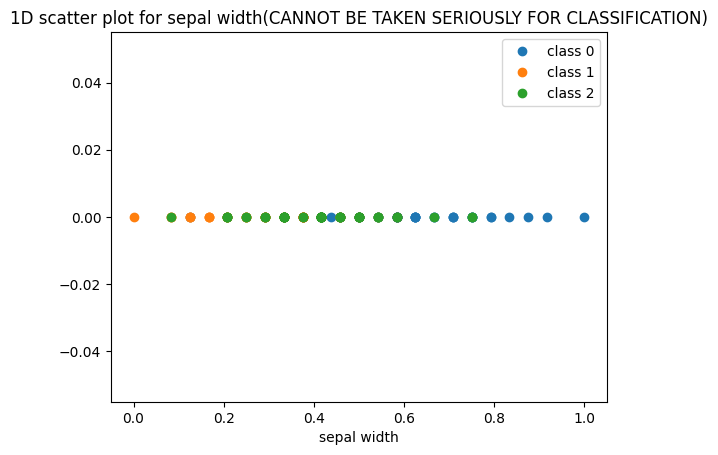

In [25]:
# correlation plotting show
import matplotlib.pyplot as plt
import numpy as np

# separate the features based on numeric labels
class_0 = features_df[target_df['species'] == 0]
class_1 = features_df[target_df['species'] == 1]
class_2 = features_df[target_df['species'] == 2]

# create 1D scatter plot for sepal width
plt.plot(class_0['sepal_width'], np.zeros_like(class_0['sepal_width']), 'o', label='class 0')
plt.plot(class_1['sepal_width'], np.zeros_like(class_1['sepal_width']), 'o', label='class 1')
plt.plot(class_2['sepal_width'], np.zeros_like(class_2['sepal_width']), 'o', label='class 2')

plt.legend()
plt.xlabel('sepal width')
plt.title('1D scatter plot for sepal width(CANNOT BE TAKEN SERIOUSLY FOR CLASSIFICATION)')
plt.show()

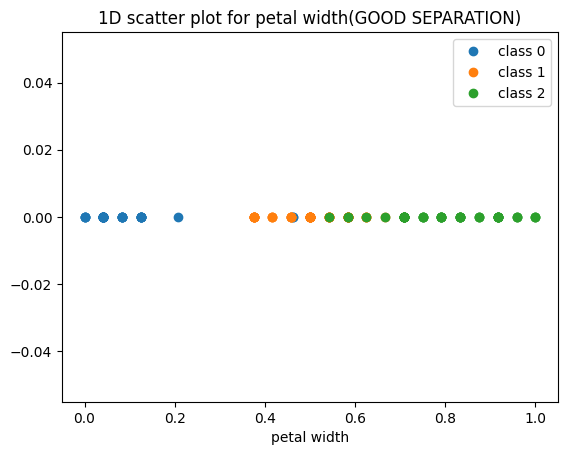

In [26]:
# correlation plotting show
import matplotlib.pyplot as plt
import numpy as np

# separate the features based on numeric labels
class_0 = features_df[target_df['species'] == 0]
class_1 = features_df[target_df['species'] == 1]
class_2 = features_df[target_df['species'] == 2]

# create 1D scatter plot for sepal width
plt.plot(class_0['petal_width'], np.zeros_like(class_0['petal_width']), 'o', label='class 0')
plt.plot(class_1['petal_width'], np.zeros_like(class_1['petal_width']), 'o', label='class 1')
plt.plot(class_2['petal_width'], np.zeros_like(class_2['petal_width']), 'o', label='class 2')

plt.legend()
plt.xlabel('petal width')
plt.title('1D scatter plot for petal width(GOOD SEPARATION)')
plt.show()

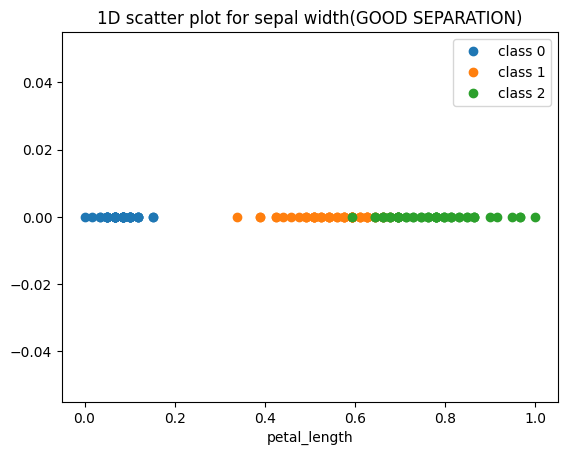

In [27]:
# correlation plotting show
import matplotlib.pyplot as plt
import numpy as np

# separate the features based on numeric labels
class_0 = features_df[target_df['species'] == 0]
class_1 = features_df[target_df['species'] == 1]
class_2 = features_df[target_df['species'] == 2]

# create 1D scatter plot for sepal width
plt.plot(class_0['petal_length'], np.zeros_like(class_0['petal_length']), 'o', label='class 0')
plt.plot(class_1['petal_length'], np.zeros_like(class_1['petal_length']), 'o', label='class 1')
plt.plot(class_2['petal_length'], np.zeros_like(class_2['petal_length']), 'o', label='class 2')

plt.legend()
plt.xlabel('petal_length')
plt.title('1D scatter plot for sepal width(GOOD SEPARATION)')
plt.show()

# TEST Accuracy

In [28]:
# create simple classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features_minmax, target, test_size=0.1, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333